In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

folder_path="/content/drive/MyDrive/EDA SLB /Datos SLB eda"

La primera base de datos engloba información acercadel control logístico y financiero del suministro donde hay litros, costos, proveedores y SAP. Se leen los cuatro exceles y agregamos una  columna de año en cada uno, en el cual se concatena al final.

In [2]:
df_2020 = pd.read_excel("Consolidado Diesel 2020.xlsx")
df_2020['Año'] = 2020
df_2020.head()





,FOLIO DORS,Fuera de Procedimiento,Fecha de Solicitud,Hora de Solicitud,MEDIO,Fecha de Servicio,Hora requerida,Solicita,Segm.,Celda,...,FLETE / MANIOBRA,COSTO TOTAL,CONCILIADO,COORDINADOR,COMENTARIOS,PERIODO,Q,LOCATION,SITE,Año
0,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,179.4,5504.590,OK,PEDRO LUIS,NaN,ENERO,Q1,MXS,POZO,2020
1,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,27.6,846.860,OK,PEDRO LUIS,NaN,ENERO,Q1,MXS,POZO,2020
2,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,27.6,846.860,OK,PEDRO LUIS,NaN,ENERO,Q1,MXS,POZO,2020
3,DIE-016932,NaN,NaT,00:00:00,NaN,2019-12-21,10:09:00,JACOBO MEDINA GUTIERREZ,WL,PS,...,0.0,1724.008,NaN,RMollinedo,NaN,ENERO,Q1,MXS,BASE,2020
4,DIE-016933,NaN,NaT,00:00:00,NaN,2019-12-21,10:45:00,EDY RICARDO SILVA HERNANDEZ,WSV,WIT,...,0.0,8146.294,NaN,RMollinedo,NaN,ENERO,Q1,MXS,BASE,2020


In [3]:
df_2021 = pd.read_excel("Consolidado Diesel 2021.xlsx")
df_2021['Año'] = 2021


In [4]:

df_2022 = pd.read_excel("Consolidado Diesel 2022.xlsx")
df_2022['Año'] = 2022



In [5]:
df_2023=pd.read_excel("Consolidado Diesel 2023.xlsx")
df_2023['Año'] = 2023

df_2024=pd.read_excel("Consolidado Diesel 2024.xlsx")
df_2024['Año'] = 2024


In [6]:
dfc = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
dfc

,FOLIO DORS,Fuera de Procedimiento,Fecha de Solicitud,Hora de Solicitud,MEDIO,Fecha de Servicio,Hora requerida,Solicita,Segm.,Celda,...,SWPS PO FLETE,Business Line,Sub Business Line,CCs,PO SAP FUEL,PO SAP FLETE,CORTES,GR SAP FUEL,GR IEPS,GR SAP FLETE
0,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DIE-016932,NaN,NaT,00:00:00,NaN,2019-12-21,10:09:00,JACOBO MEDINA GUTIERREZ,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DIE-016933,NaN,NaT,00:00:00,NaN,2019-12-21,10:45:00,EDY RICARDO SILVA HERNANDEZ,WSV,WIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34996,DI35009,NaN,2024-12-21,10:34:00,NaN,2024-12-23,09:30:00,DAVID MAY,NaN,NaN,...,NaN,IGWC,IDST,R.20002742.01.01.05,4793676706,NaN,MXS-21-Dic to 31-Dic 2024-POZO,5.013538e+09,5.013538e+09,NaN
34997,DI35010,NaN,2024-12-21,10:36:00,NaN,2024-12-28,09:30:00,DAVID MAY,NaN,NaN,...,NaN,IGWC,IDST,R.20002742.01.01.05,4793676732,NaN,MXS-21-Dic to 31-Dic 2024-POZO,5.013538e+09,5.013538e+09,NaN
34998,DI35014,NaN,2024-12-23,09:43:00,NaN,2024-12-23,15:00:00,JOSE ARANO,NaN,NaN,...,NaN,WCF,MDS,NaN,4793664053,NaN,MXS-21-Dic to 31-Dic 2024-MI SWACO,5.013599e+09,5.013599e+09,NaN
34999,DI35046,NaN,2024-12-28,10:15:00,NaN,2024-12-29,09:13:00,JAVIER BETANCOURT,NaN,NaN,...,NaN,WCF,MDS,NaN,4793670677,NaN,MXS-21-Dic to 31-Dic 2024-MI SWACO,5.013474e+09,5.013475e+09,NaN


In [8]:
print(dfc.columns)

Index(['FOLIO DORS', 'Fuera de Procedimiento', 'Fecha de Solicitud',
       'Hora de Solicitud', 'MEDIO', 'Fecha de Servicio', 'Hora requerida',
       'Solicita', 'Segm.', 'Celda', 'Destino/Pozo', 'Lts. Solicitados',
       'Economico', 'Tipo de Unidad', 'Clasificacion (Vehiculo/Equipo)',
       'Tipo de medida Km/Hr', 'Recibe en Pozo/usuario', 'Autorizante',
       'STATUS', 'Zona', 'Ruta', 'Proveedor', 'Eco Unidad Proveedor',
       'Operador', 'HR', 'KM', 'HR Llegada a Pozo', 'Tiempo de Retraso',
       'Cant. Sum.', 'PRECIO POR LT', 'COSTO DE SUMINISTRO', 'Gin Number',
       'Recibe en Pozo/usuario.1', 'TICKET', 'FLETE', 'KM RECORRIDO',
       'FLETE / MANIOBRA', 'COSTO TOTAL', 'CONCILIADO', 'COORDINADOR',
       'COMENTARIOS', 'PERIODO', 'Q', 'LOCATION', 'SITE', 'Año',
       'Fuera de Tiempo', 'BL', 'SBL', 'Cant. Suministrada', 'IEPS x LT',
       'Costo IEPS', 'Costo TOTAL SIN IEPS', 'Costo Total + IEPS',
       'SWPS PO DIESEL', 'SWPS PO FLETE', 'Business Line', 'Sub Business

Se pone la columna año al final.

In [9]:
columna_anio = dfc.pop('Año')
dfc['Año'] = columna_anio
dfc

,FOLIO DORS,Fuera de Procedimiento,Fecha de Solicitud,Hora de Solicitud,MEDIO,Fecha de Servicio,Hora requerida,Solicita,Segm.,Celda,...,Business Line,Sub Business Line,CCs,PO SAP FUEL,PO SAP FLETE,CORTES,GR SAP FUEL,GR IEPS,GR SAP FLETE,Año
0,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,DI20742,NO,2019-12-19,19:30:00,DORS,2019-12-21,08:00:00,SUFIYAN KHAN,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,DIE-016932,NaN,NaT,00:00:00,NaN,2019-12-21,10:09:00,JACOBO MEDINA GUTIERREZ,WL,PS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,DIE-016933,NaN,NaT,00:00:00,NaN,2019-12-21,10:45:00,EDY RICARDO SILVA HERNANDEZ,WSV,WIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34996,DI35009,NaN,2024-12-21,10:34:00,NaN,2024-12-23,09:30:00,DAVID MAY,NaN,NaN,...,IGWC,IDST,R.20002742.01.01.05,4793676706,NaN,MXS-21-Dic to 31-Dic 2024-POZO,5.013538e+09,5.013538e+09,NaN,2024
34997,DI35010,NaN,2024-12-21,10:36:00,NaN,2024-12-28,09:30:00,DAVID MAY,NaN,NaN,...,IGWC,IDST,R.20002742.01.01.05,4793676732,NaN,MXS-21-Dic to 31-Dic 2024-POZO,5.013538e+09,5.013538e+09,NaN,2024
34998,DI35014,NaN,2024-12-23,09:43:00,NaN,2024-12-23,15:00:00,JOSE ARANO,NaN,NaN,...,WCF,MDS,NaN,4793664053,NaN,MXS-21-Dic to 31-Dic 2024-MI SWACO,5.013599e+09,5.013599e+09,NaN,2024
34999,DI35046,NaN,2024-12-28,10:15:00,NaN,2024-12-29,09:13:00,JAVIER BETANCOURT,NaN,NaN,...,WCF,MDS,NaN,4793670677,NaN,MXS-21-Dic to 31-Dic 2024-MI SWACO,5.013474e+09,5.013475e+09,NaN,2024


Se imprime columnas.

In [10]:
print(dfc.columns)

Index(['FOLIO DORS', 'Fuera de Procedimiento', 'Fecha de Solicitud',
       'Hora de Solicitud', 'MEDIO', 'Fecha de Servicio', 'Hora requerida',
       'Solicita', 'Segm.', 'Celda', 'Destino/Pozo', 'Lts. Solicitados',
       'Economico', 'Tipo de Unidad', 'Clasificacion (Vehiculo/Equipo)',
       'Tipo de medida Km/Hr', 'Recibe en Pozo/usuario', 'Autorizante',
       'STATUS', 'Zona', 'Ruta', 'Proveedor', 'Eco Unidad Proveedor',
       'Operador', 'HR', 'KM', 'HR Llegada a Pozo', 'Tiempo de Retraso',
       'Cant. Sum.', 'PRECIO POR LT', 'COSTO DE SUMINISTRO', 'Gin Number',
       'Recibe en Pozo/usuario.1', 'TICKET', 'FLETE', 'KM RECORRIDO',
       'FLETE / MANIOBRA', 'COSTO TOTAL', 'CONCILIADO', 'COORDINADOR',
       'COMENTARIOS', 'PERIODO', 'Q', 'LOCATION', 'SITE', 'Fuera de Tiempo',
       'BL', 'SBL', 'Cant. Suministrada', 'IEPS x LT', 'Costo IEPS',
       'Costo TOTAL SIN IEPS', 'Costo Total + IEPS', 'SWPS PO DIESEL',
       'SWPS PO FLETE', 'Business Line', 'Sub Business Line',

In [11]:
dfc.describe()

,Fecha de Solicitud,Fecha de Servicio,KM,Cant. Sum.,PRECIO POR LT,COSTO DE SUMINISTRO,FLETE,FLETE / MANIOBRA,COSTO TOTAL,Cant. Suministrada,IEPS x LT,Costo IEPS,Costo TOTAL SIN IEPS,Costo Total + IEPS,GR SAP FUEL,GR IEPS,Año
count,17449,35001,4.340000e+02,7025.000000,34997.000000,7.025000e+03,24426.000000,30352.000000,3.500100e+04,27970.000000,27976.000000,27976.000000,2.797600e+04,2.797600e+04,1.232100e+04,1.232100e+04,35001.000000
mean,2022-03-10 00:02:33.498767872,2022-04-30 09:35:44.201594112,8.233311e+04,2388.421577,1869.971142,4.155076e+04,0.065627,263.508946,8.446630e+04,4750.981626,0.327609,1679.747610,7.958945e+04,9.495498e+04,5.015436e+09,5.008775e+09,2021.863204
min,1900-01-27 00:00:00,2019-12-21 00:00:00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,5.006347e+08,4.792024e+09,2020.000000
25%,2021-03-04 00:00:00,2021-03-13 00:00:00,3.662750e+04,78.600000,18.120000,1.396000e+03,0.000000,0.000000,2.454284e+03,137.025000,0.374675,0.000000,0.000000e+00,2.690593e+03,5.007256e+09,5.007256e+09,2021.000000
50%,2022-05-10 00:00:00,2022-06-04 00:00:00,7.350100e+04,238.000000,19.541071,4.191490e+03,0.000000,0.000000,6.070955e+03,300.000000,0.402288,90.471600,4.201721e+03,6.169232e+03,5.008659e+09,5.008659e+09,2022.000000
75%,2023-04-03 00:00:00,2023-05-27 00:00:00,1.041738e+05,600.000000,20.377278,1.045974e+04,0.000000,0.000000,1.406510e+04,703.000000,0.433626,216.813000,1.024870e+04,1.442000e+04,5.010357e+09,5.010357e+09,2023.000000
max,2024-12-30 00:00:00,2024-12-31 00:00:00,1.008410e+06,69849.000000,23747.970000,1.147572e+06,1.000000,17800.000000,3.485448e+06,70385.000000,0.452358,31665.060000,1.495806e+06,3.485448e+06,5.000856e+10,5.013599e+09,2024.000000
std,NaN,NaN,9.052464e+04,8372.411573,5702.846121,1.438328e+05,0.197935,1001.907546,2.317851e+05,12368.428862,0.176807,4839.697519,2.294336e+05,2.478748e+05,5.761913e+08,6.172733e+06,1.305297


Se imprime la dimensión del dataset antes de eliminar ciertas columnas, con el critierio de si una columna tiene más de 75% nulos, se elimina.

In [12]:
print("Shape:", dfc.shape)

Shape: (35001, 65)


Se tiene un dataset, con 350001 filas y 65 columnas

In [13]:
# Número de filas
print("Número de filas:", dfc.shape[0])

# Número de columnas
print("Número de columnas:", dfc.shape[1])


Número de filas: 35001
Número de columnas: 65


In [14]:
# Mostrar todas las filas del DataFrame al imprimir
pd.set_option('display.max_rows', None)

# Ver porcentaje de nulos por columna
porcentaje_nulos = dfc.isnull().mean() * 100
print(porcentaje_nulos)

FOLIO DORS                          0.000000
Fuera de Procedimiento             90.108854
Fecha de Solicitud                 50.147139
Hora de Solicitud                  29.210594
MEDIO                              78.069198
Fecha de Servicio                   0.000000
Hora requerida                      0.000000
Solicita                            0.042856
Segm.                              79.929145
Celda                              79.929145
Destino/Pozo                        0.000000
Lts. Solicitados                    0.000000
Economico                           0.000000
Tipo de Unidad                      0.159995
Clasificacion (Vehiculo/Equipo)    59.344019
Tipo de medida Km/Hr               64.715294
Recibe en Pozo/usuario              0.045713
Autorizante                         0.000000
STATUS                              2.448501
Zona                               19.019457
Ruta                               69.498014
Proveedor                          10.202566
Eco Unidad

Se calculan porcentajes.

In [15]:
# Ver porcentaje de nulos por columna
porcentaje_nulos = dfc.isnull().mean() * 100
print(porcentaje_nulos)

# Filtrar columnas con más del 75% de nulos
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 75].index
print("Columnas eliminadas:", columnas_a_eliminar.tolist())

# Eliminar columnas
dfc = dfc.drop(columns=columnas_a_eliminar)

FOLIO DORS                          0.000000
Fuera de Procedimiento             90.108854
Fecha de Solicitud                 50.147139
Hora de Solicitud                  29.210594
MEDIO                              78.069198
Fecha de Servicio                   0.000000
Hora requerida                      0.000000
Solicita                            0.042856
Segm.                              79.929145
Celda                              79.929145
Destino/Pozo                        0.000000
Lts. Solicitados                    0.000000
Economico                           0.000000
Tipo de Unidad                      0.159995
Clasificacion (Vehiculo/Equipo)    59.344019
Tipo de medida Km/Hr               64.715294
Recibe en Pozo/usuario              0.045713
Autorizante                         0.000000
STATUS                              2.448501
Zona                               19.019457
Ruta                               69.498014
Proveedor                          10.202566
Eco Unidad

El dataset, después de eliminar dataframe con 75% de datos nulos.

In [16]:
print("Shape:", dfc.shape)

Shape: (35001, 50)


In [17]:
# Número de filas
print("Número de filas:", dfc.shape[0])

# Número de columnas
print("Número de columnas:", dfc.shape[1])

Número de filas: 35001
Número de columnas: 50


El dataset tiene 35001 filas y 50 columnas

In [18]:
print(dfc.columns)

Index(['FOLIO DORS', 'Fecha de Solicitud', 'Hora de Solicitud',
       'Fecha de Servicio', 'Hora requerida', 'Solicita', 'Destino/Pozo',
       'Lts. Solicitados', 'Economico', 'Tipo de Unidad',
       'Clasificacion (Vehiculo/Equipo)', 'Tipo de medida Km/Hr',
       'Recibe en Pozo/usuario', 'Autorizante', 'STATUS', 'Zona', 'Ruta',
       'Proveedor', 'Eco Unidad Proveedor', 'Operador', 'HR Llegada a Pozo',
       'Tiempo de Retraso', 'PRECIO POR LT', 'Gin Number',
       'Recibe en Pozo/usuario.1', 'TICKET', 'FLETE', 'KM RECORRIDO',
       'FLETE / MANIOBRA', 'COSTO TOTAL', 'CONCILIADO', 'COORDINADOR',
       'PERIODO', 'Q', 'LOCATION', 'SITE', 'Fuera de Tiempo',
       'Cant. Suministrada', 'IEPS x LT', 'Costo IEPS', 'Costo TOTAL SIN IEPS',
       'Costo Total + IEPS', 'Business Line', 'Sub Business Line', 'CCs',
       'PO SAP FUEL', 'CORTES', 'GR SAP FUEL', 'GR IEPS', 'Año'],
      dtype='object')


In [19]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35001 entries, 0 to 35000
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   FOLIO DORS                       35001 non-null  object        
 1   Fecha de Solicitud               17449 non-null  datetime64[ns]
 2   Hora de Solicitud                24777 non-null  object        
 3   Fecha de Servicio                35001 non-null  datetime64[ns]
 4   Hora requerida                   35001 non-null  object        
 5   Solicita                         34986 non-null  object        
 6   Destino/Pozo                     35001 non-null  object        
 7   Lts. Solicitados                 35001 non-null  object        
 8   Economico                        35001 non-null  object        
 9   Tipo de Unidad                   34945 non-null  object        
 10  Clasificacion (Vehiculo/Equipo)  14230 non-null  object   

In [20]:
dfc['Lts. Solicitados'] = pd.to_numeric(dfc['Lts. Solicitados'], errors='coerce')
dfc['KM RECORRIDO'] = pd.to_numeric(dfc['KM RECORRIDO'], errors='coerce')

In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35001 entries, 0 to 35000
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   FOLIO DORS                       35001 non-null  object        
 1   Fecha de Solicitud               17449 non-null  datetime64[ns]
 2   Hora de Solicitud                24777 non-null  object        
 3   Fecha de Servicio                35001 non-null  datetime64[ns]
 4   Hora requerida                   35001 non-null  object        
 5   Solicita                         34986 non-null  object        
 6   Destino/Pozo                     35001 non-null  object        
 7   Lts. Solicitados                 34999 non-null  float64       
 8   Economico                        35001 non-null  object        
 9   Tipo de Unidad                   34945 non-null  object        
 10  Clasificacion (Vehiculo/Equipo)  14230 non-null  object   

Se selecciono 23 variables más relevantes para el análisis en el cuál son 13 cuantitativas y 10 cualitativas.

In [ ]:

# Se convierte columnas numéricas que estaban como object
cols_numericas_objeto = ['Lts. Solicitados', 'KM RECORRIDO']
for col in cols_numericas_objeto:
    dfc[col] = pd.to_numeric(dfc[col], errors='coerce')

# Se filtra las columnas clave para el EDA

# Variables Cuantitativas:
# 'Lts. Solicitados'         : Litros de combustible solicitados por la unidad o equipo.
# 'Cant. Suministrada'       : Litros de combustible realmente suministrados.
# 'PRECIO POR LT'            : Precio por litro del combustible suministrado.
# 'FLETE'                    : Costo asociado al traslado del combustible (sin maniobras).
# 'FLETE / MANIOBRA'         : Costo total de traslado y maniobras asociadas.
# 'COSTO TOTAL'              : Costo total de la operación, incluyendo flete, combustible, maniobra, etc.
# 'IEPS x LT'                : Impuesto IEPS aplicado por litro de combustible.
# 'Costo IEPS'               : Monto total pagado por concepto de IEPS.
# 'Costo TOTAL SIN IEPS'    : Costo total de la operación sin considerar el IEPS.
# 'Costo Total + IEPS'      : Costo total de la operación considerando el IEPS.
# 'KM RECORRIDO'            : Kilómetros recorridos por la unidad en la ruta especificada.
# 'GR SAP FUEL'             : Clasificación o código interno SAP para el combustible.
# 'GR IEPS'                 : Clasificación o código SAP relacionado con el IEPS.
columnas_cuantitativas = [
    'Lts. Solicitados', 'Cant.  Suministrada', 'PRECIO POR LT', 'FLETE', 'FLETE / MANIOBRA',
    'COSTO TOTAL', 'IEPS x LT', 'Costo IEPS', 'Costo TOTAL SIN IEPS', 'Costo Total + IEPS',
    'KM RECORRIDO', 'GR SAP FUEL', 'GR IEPS'
]


# Variables Cualitativas:
# 'Tipo de Unidad'                   : Tipo de vehículo o equipo (e.g., camión, pipa, maquinaria).
# 'Clasificacion (Vehiculo/Equipo)' : Clasificación general de la unidad como vehículo o equipo.
# 'Destino/Pozo'                    : Lugar o pozo al que se dirige el combustible.
# 'Zona'                            : Zona geográfica de operación o destino.
# 'Ruta'                            : Ruta logística o de transporte utilizada.
# 'Proveedor'                       : Empresa o entidad que suministra el combustible.
# 'SITE'                            : Sitio operativo donde se encuentra la unidad o el destino del suministro.
# 'Business Line'                   : Línea de negocio a la que pertenece la operación (e.g., perforación, mantenimiento).
# 'Sub Business Line'              : Subcategoría dentro de la línea de negocio.
# 'PERIODO'                         : Periodo de tiempo (mes, trimestre, año) en el que se registró la operación.
columnas_cualitativas = [
    'Tipo de Unidad', 'Clasificacion (Vehiculo/Equipo)', 'Destino/Pozo', 'Zona', 'Ruta',
    'Proveedor', 'SITE', 'Business Line', 'Sub Business Line', 'PERIODO'
]


In [23]:
dfc[columnas_cuantitativas].describe()

,Lts. Solicitados,Cant. Suministrada,PRECIO POR LT,FLETE,FLETE / MANIOBRA,COSTO TOTAL,IEPS x LT,Costo IEPS,Costo TOTAL SIN IEPS,Costo Total + IEPS,KM RECORRIDO,GR SAP FUEL,GR IEPS
count,34999.000000,27970.000000,34997.000000,24426.000000,30352.000000,3.500100e+04,27976.000000,27976.000000,2.797600e+04,2.797600e+04,27446.000000,1.232100e+04,1.232100e+04
mean,4433.715624,4750.981626,1869.971142,0.065627,263.508946,8.446630e+04,0.327609,1679.747610,7.958945e+04,9.495498e+04,7.061295,5.015436e+09,5.008775e+09
std,12078.468450,12368.428862,5702.846121,0.197935,1001.907546,2.317851e+05,0.176807,4839.697519,2.294336e+05,2.478748e+05,28.687911,5.761913e+08,6.172733e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,5.006347e+08,4.792024e+09
25%,200.000000,137.025000,18.120000,0.000000,0.000000,2.454284e+03,0.374675,0.000000,0.000000e+00,2.690593e+03,0.000000,5.007256e+09,5.007256e+09
50%,368.090000,300.000000,19.541071,0.000000,0.000000,6.070955e+03,0.402288,90.471600,4.201721e+03,6.169232e+03,0.000000,5.008659e+09,5.008659e+09
75%,800.000000,703.000000,20.377278,0.000000,0.000000,1.406510e+04,0.433626,216.813000,1.024870e+04,1.442000e+04,0.000000,5.010357e+09,5.010357e+09
max,160000.000000,70385.000000,23747.970000,1.000000,17800.000000,3.485448e+06,0.452358,31665.060000,1.495806e+06,3.485448e+06,450.000000,5.000856e+10,5.013599e+09


Se calcula medidas estadísticas

In [24]:
for col in columnas_cuantitativas:
    print(f"\n {col}")
    print(f"Promedio: {dfc[col].mean()}")
    print(f"Mediana: {dfc[col].median()}")
    print(f"Moda: {dfc[col].mode().values}")


 Lts. Solicitados
Promedio: 4433.71562416069
Mediana: 368.09
Moda: [300.]

 Cant. Suministrada
Promedio: 4750.981626278156
Mediana: 300.0
Moda: [300.]

 PRECIO POR LT
Promedio: 1869.97114171012
Mediana: 19.541070689655175
Moda: [17.43]

 FLETE
Promedio: 0.06562679108327193
Mediana: 0.0
Moda: [0.]

 FLETE / MANIOBRA
Promedio: 263.50894609910387
Mediana: 0.0
Moda: [0.]

 COSTO TOTAL
Promedio: 84466.30407405354
Mediana: 6070.9554
Moda: [0.]

 IEPS x LT
Promedio: 0.3276094760866457
Mediana: 0.402288
Moda: [0.402288]

 Costo IEPS
Promedio: 1679.747610205319
Mediana: 90.4716
Moda: [0.]

 Costo TOTAL SIN IEPS
Promedio: 79589.44746181692
Mediana: 4201.72072
Moda: [0.]

 Costo Total + IEPS
Promedio: 94954.97583346876
Mediana: 6169.232399999999
Moda: [0.]

 KM RECORRIDO
Promedio: 7.061294542009772
Mediana: 0.0
Moda: [0.]

 GR SAP FUEL
Promedio: 5015435716.655872
Mediana: 5008658975.0
Moda: [5.00796481e+09]

 GR IEPS
Promedio: 5008774849.176609
Mediana: 5008659052.0
Moda: [5.00796481e+09]


In [25]:
for col in columnas_cuantitativas:
    print(f"\n {col}")
    print(f"Máximo: {dfc[col].max()}, Mínimo: {dfc[col].min()}")
    print(f"Rango: {dfc[col].max() - dfc[col].min()}")
    print(f"Varianza: {dfc[col].var()}")
    print(f"Desviación estándar: {dfc[col].std()}")


 Lts. Solicitados
Máximo: 160000.0, Mínimo: 0.0
Rango: 160000.0
Varianza: 145889400.09604046
Desviación estándar: 12078.468449933562

 Cant. Suministrada
Máximo: 70385.0, Mínimo: 0.0
Rango: 70385.0
Varianza: 152978032.52559716
Desviación estándar: 12368.428862454486

 PRECIO POR LT
Máximo: 23747.97, Mínimo: 0.0
Rango: 23747.97
Varianza: 32522453.88084012
Desviación estándar: 5702.846121090777

 FLETE
Máximo: 1.0, Mínimo: 0.0
Rango: 1.0
Varianza: 0.039178383508927425
Desviación estándar: 0.1979353013207281

 FLETE / MANIOBRA
Máximo: 17800.0, Mínimo: 0.0
Rango: 17800.0
Varianza: 1003818.7299737806
Desviación estándar: 1001.9075456217407

 COSTO TOTAL
Máximo: 3485448.0, Mínimo: 0.0
Rango: 3485448.0
Varianza: 53724329730.39426
Desviación estándar: 231785.0938485783

 IEPS x LT
Máximo: 0.452358, Mínimo: 0.0
Rango: 0.452358
Varianza: 0.03126085227731461
Desviación estándar: 0.176807387507747

 Costo IEPS
Máximo: 31665.059999999998, Mínimo: 0.0
Rango: 31665.059999999998
Varianza: 23422672.07

In [26]:
for col in columnas_cualitativas:
    print(f"\n {col} - Frecuencias:")
    print(dfc[col].value_counts().head(10))


 Tipo de Unidad - Frecuencias:
Tipo de Unidad
QUINTA                 9119
TANQUE ESTACIONARIO    3958
TOTE                   3226
UNIDAD DE REGISTRO     2415
GENERADOR              2135
MONTACARGA             2019
CPF                    1171
UNIDAD DE BOMBEO       1104
RECIRCULADOR           1067
COMPRESOR               967
Name: count, dtype: int64

 Clasificacion (Vehiculo/Equipo) - Frecuencias:
Clasificacion (Vehiculo/Equipo)
EQUIPO      7521
VEHICULO    6630
UNIDAD        70
QUINTA         5
TANQUE         4
Name: count, dtype: int64

 Destino/Pozo - Frecuencias:
Destino/Pozo
ESTACION DIESEL                  17552
PLANTA MI SWACO PARAISO           1788
BELLOTA 1 A                        740
BASE SLB POZA RICA                 717
BELLOTA 1A                         671
PLANTA MI SWACO HUASTECA           632
BATERIA RABASA                     412
PLANTA MI SWACO REYNOSA            238
BASE SLB REYNOSA                   227
PLANTA MI SWACO CD DEL CARMEN      218
Name: count, dtype: in

Se exploran los datos usando herramientas de visualización.

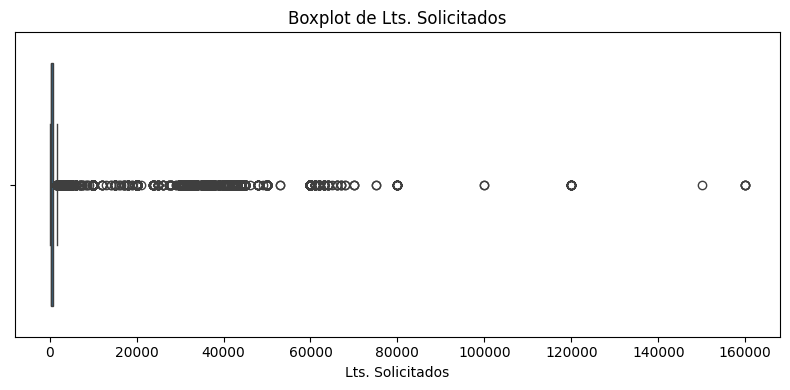

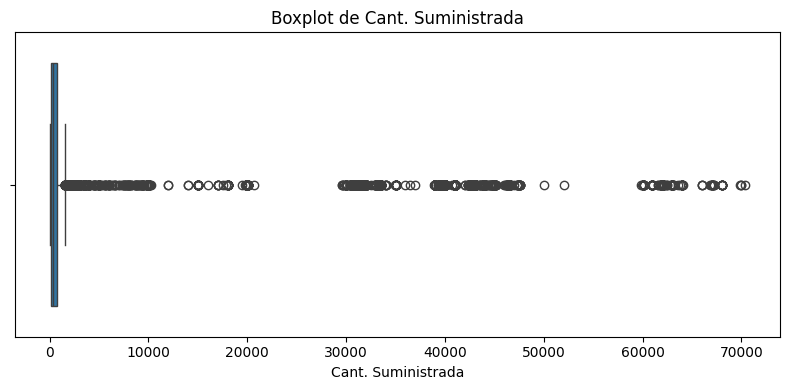

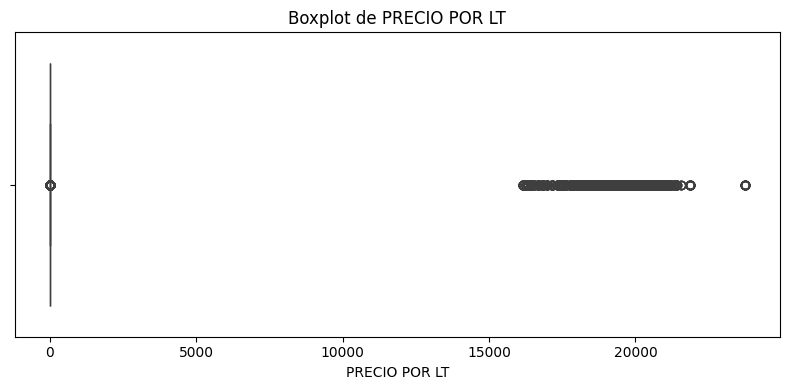

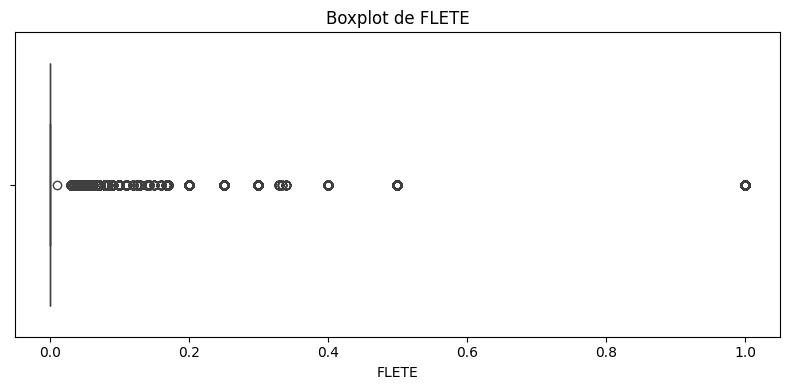

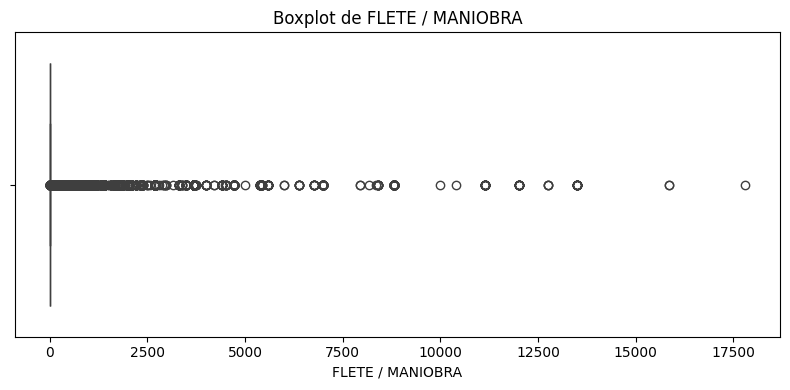

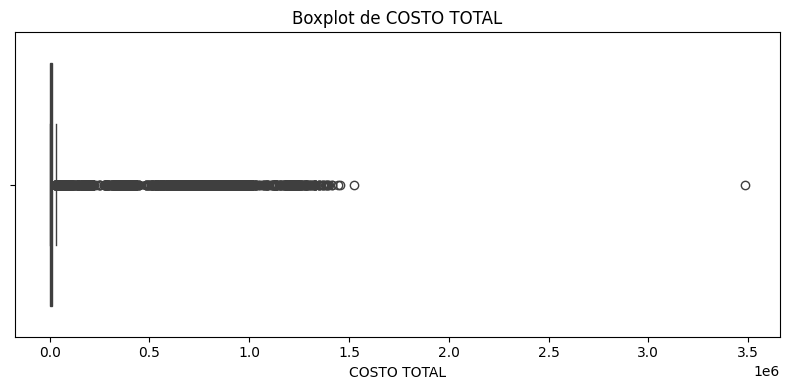

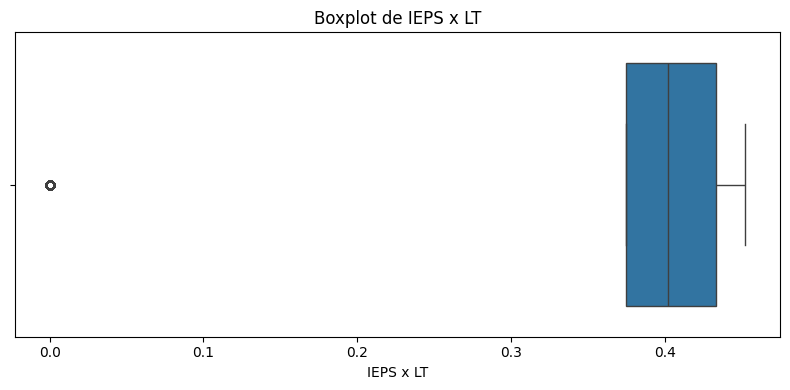

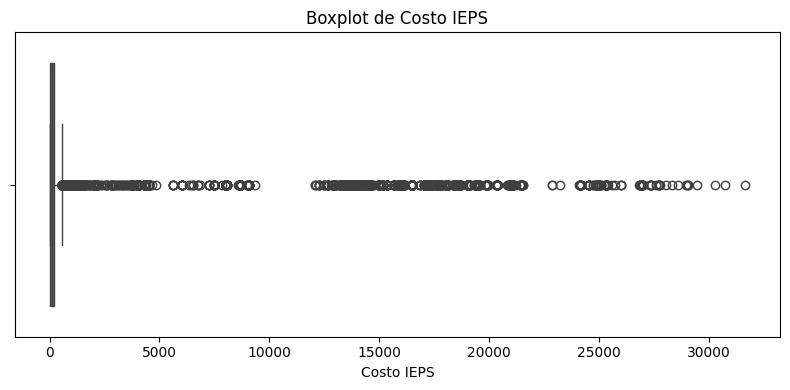

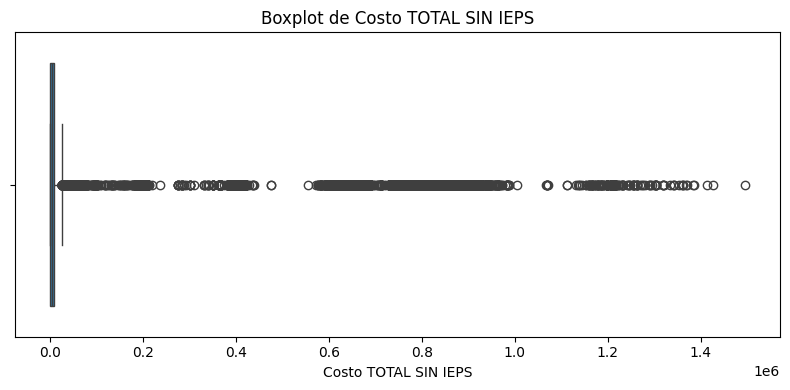

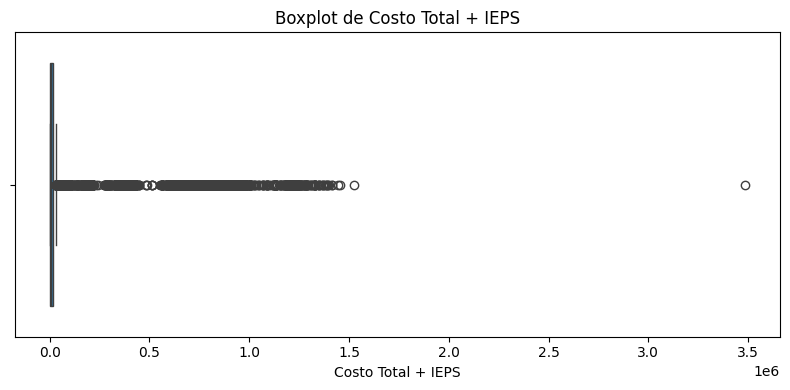

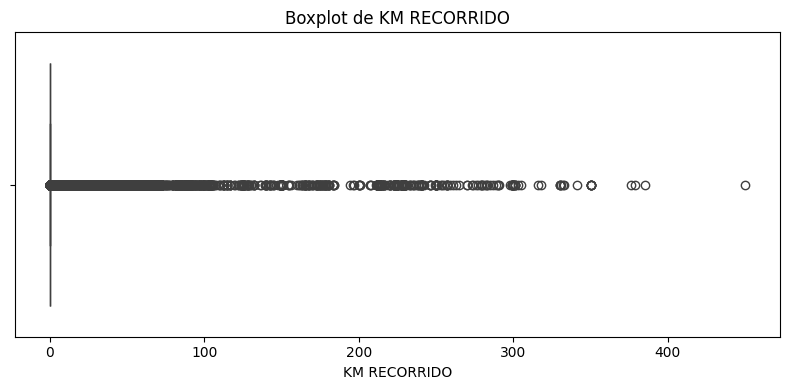

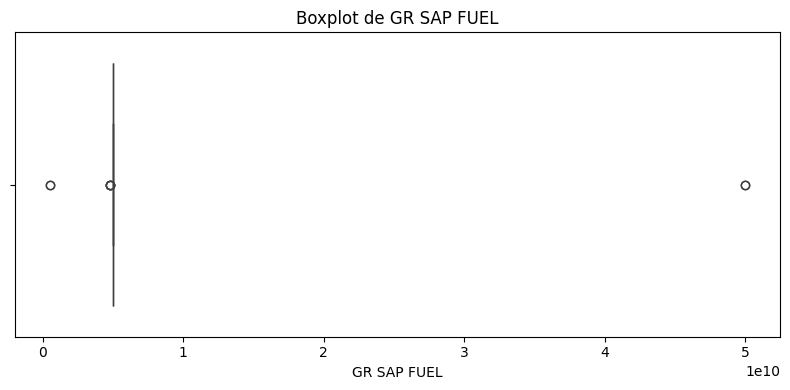

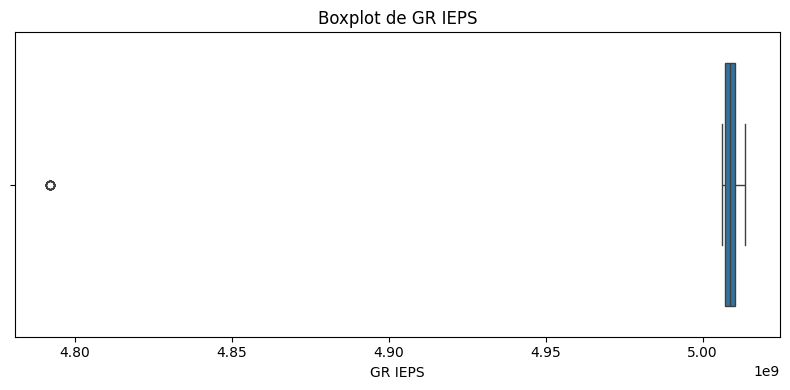

In [27]:
for col in columnas_cuantitativas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dfc[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

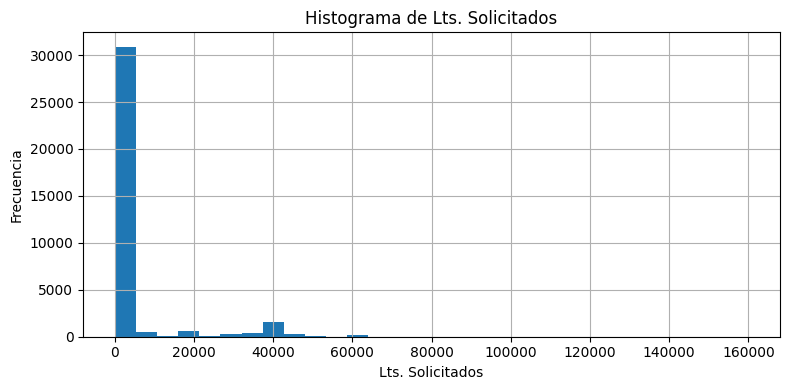

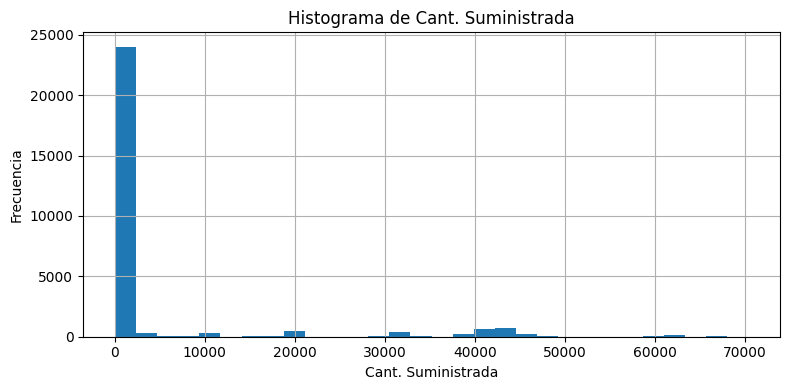

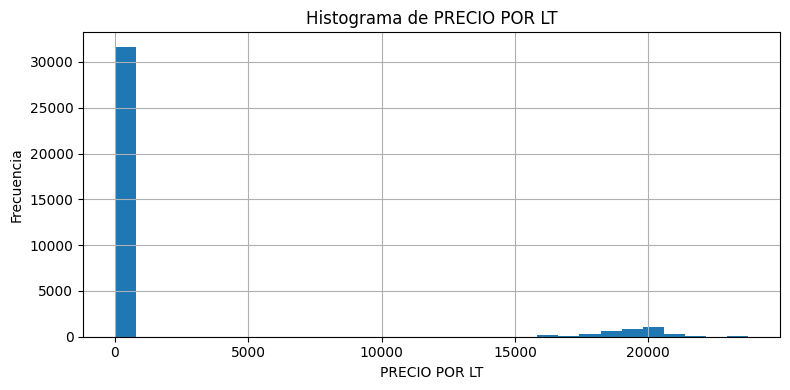

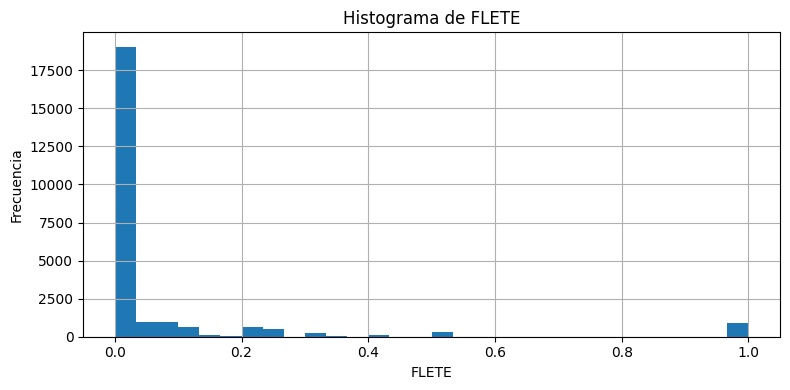

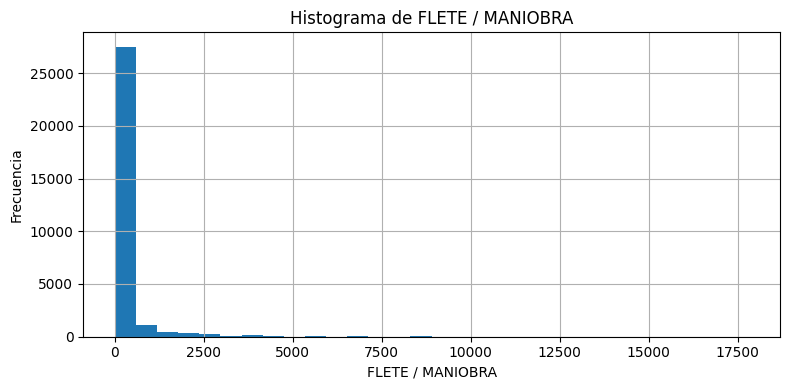

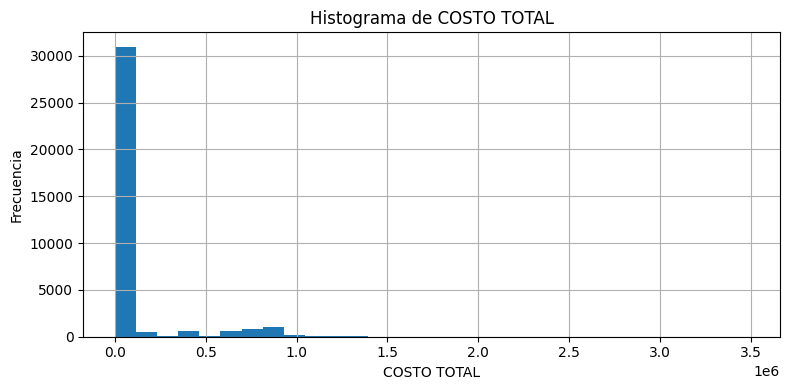

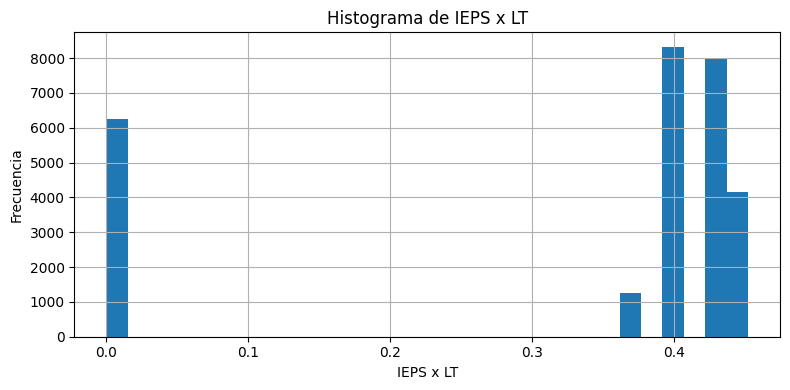

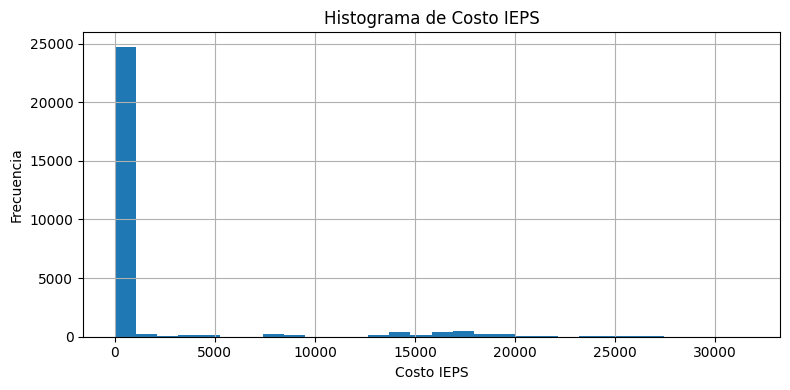

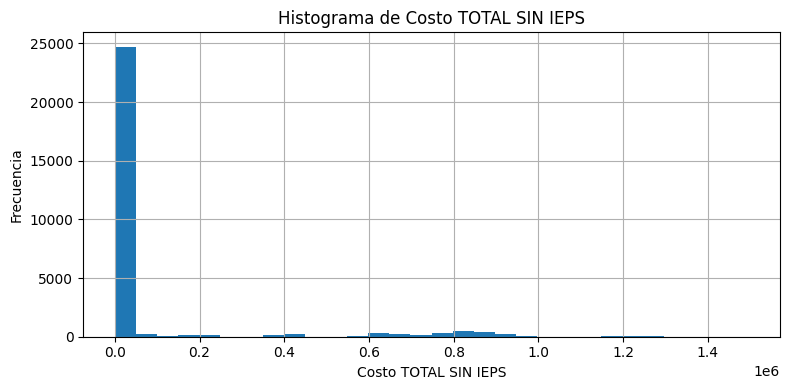

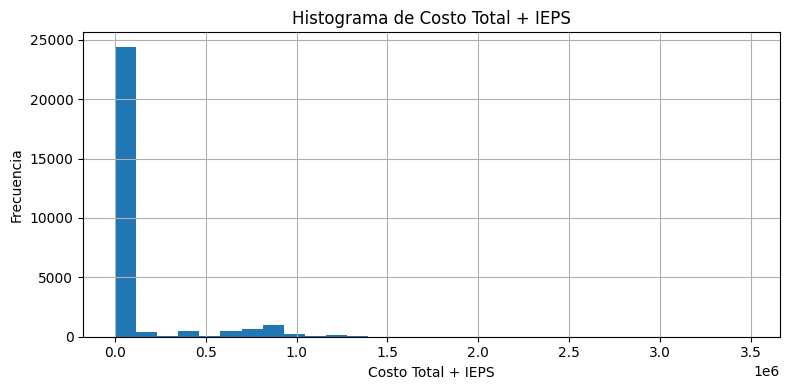

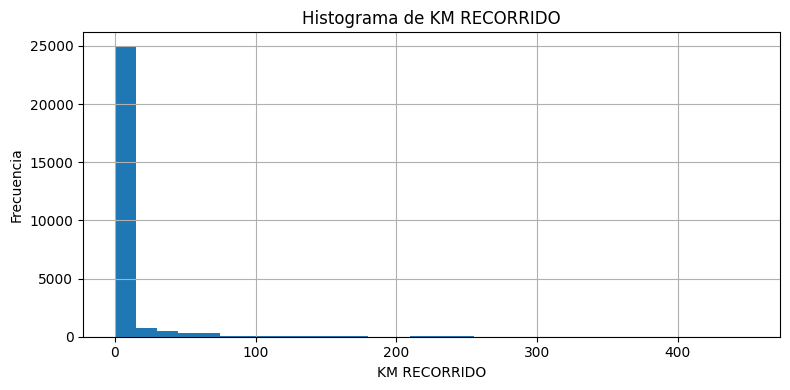

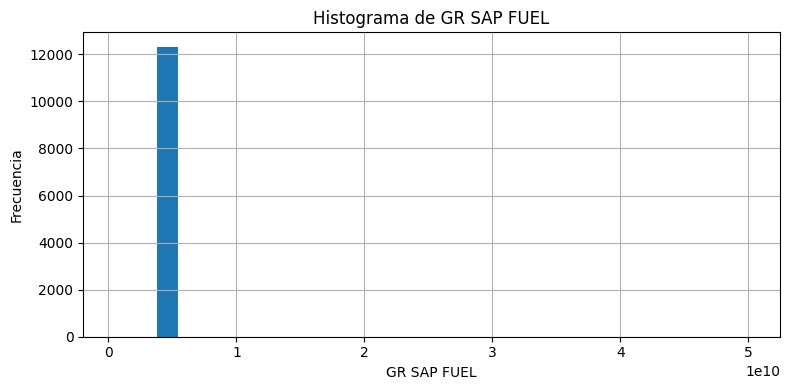

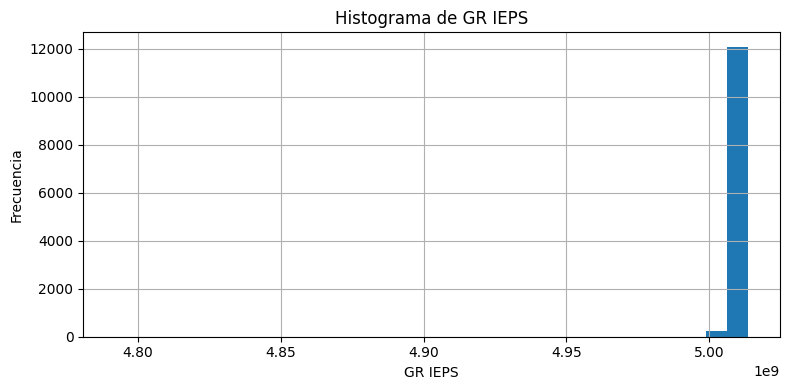

In [28]:
for col in columnas_cuantitativas:
    plt.figure(figsize=(8, 4))
    dfc[col].hist(bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


In [39]:
columnas_cuantitativas

['Lts. Solicitados',
 'Cant. Suministrada',
 'PRECIO POR LT',
 'FLETE',
 'FLETE / MANIOBRA',
 'COSTO TOTAL',
 'IEPS x LT',
 'Costo IEPS',
 'Costo TOTAL SIN IEPS',
 'Costo Total + IEPS',
 'KM RECORRIDO',
 'GR SAP FUEL',
 'GR IEPS']

In [40]:
columnas_cualitativas

['Tipo de Unidad',
 'Clasificacion (Vehiculo/Equipo)',
 'Destino/Pozo',
 'Zona',
 'Ruta',
 'Proveedor',
 'SITE',
 'Business Line',
 'Sub Business Line',
 'PERIODO']

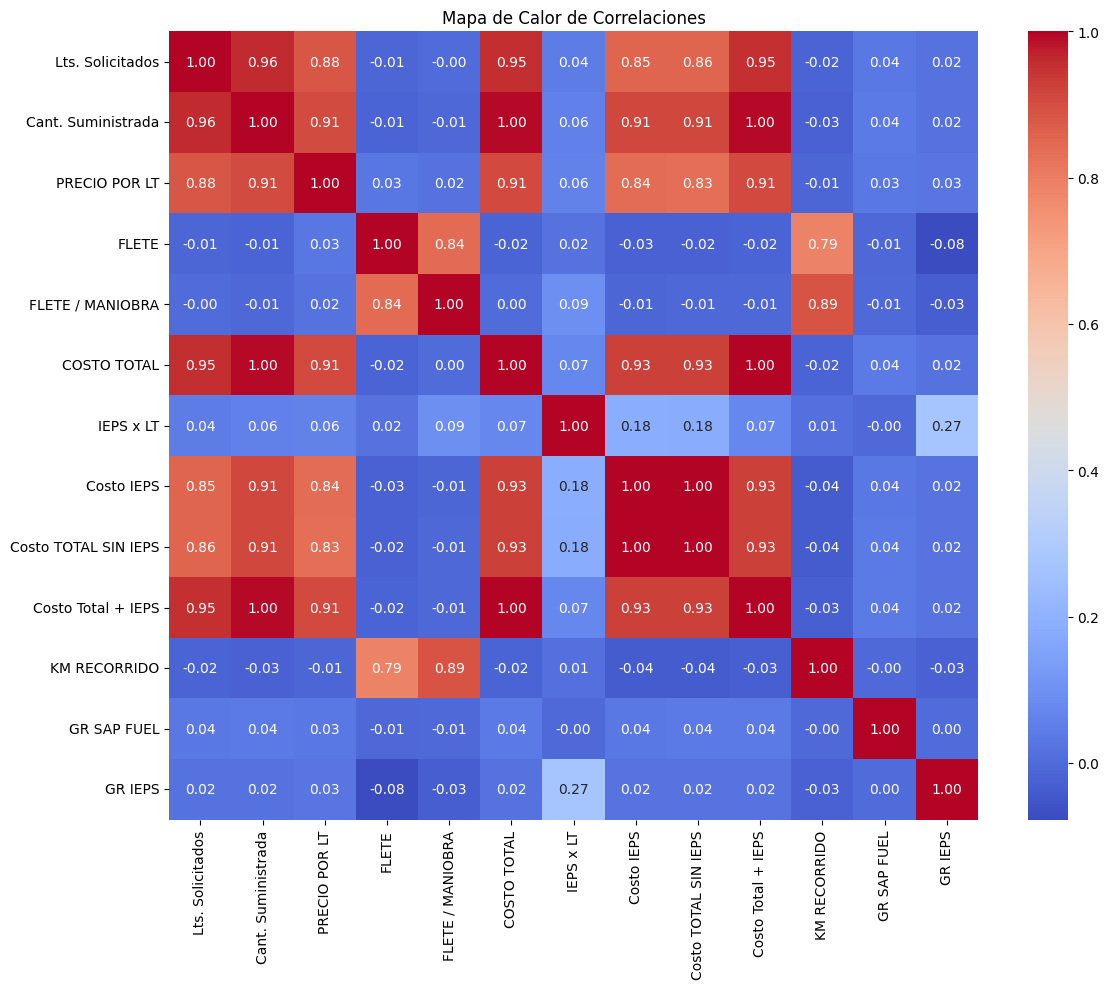

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfc[columnas_cuantitativas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()

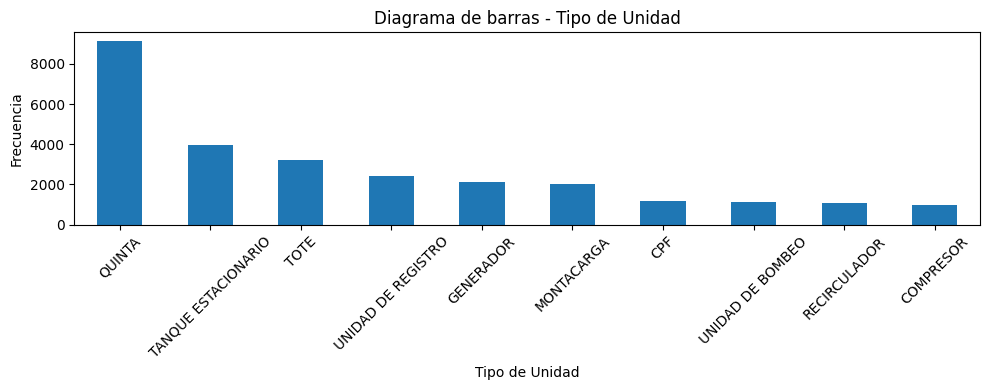

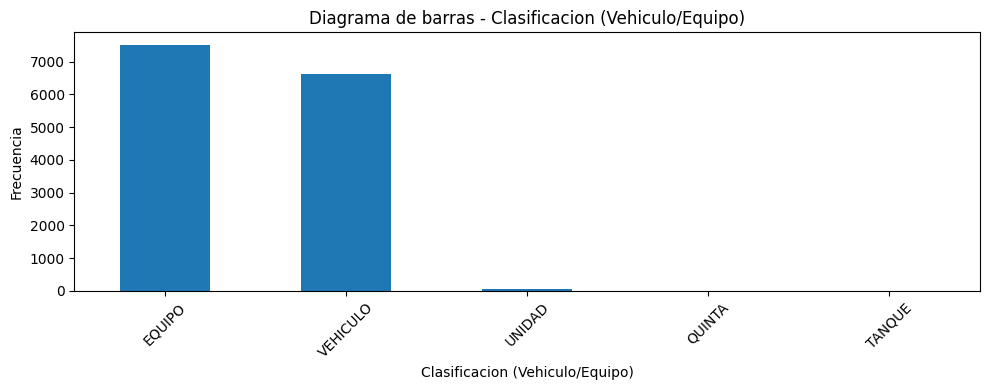

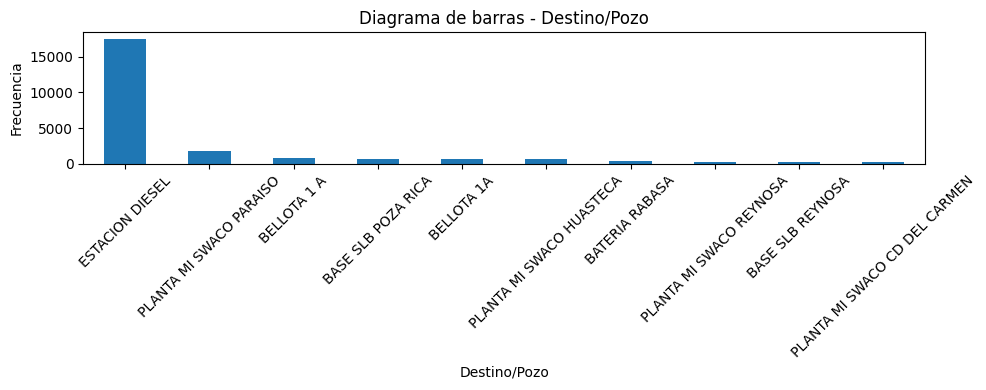

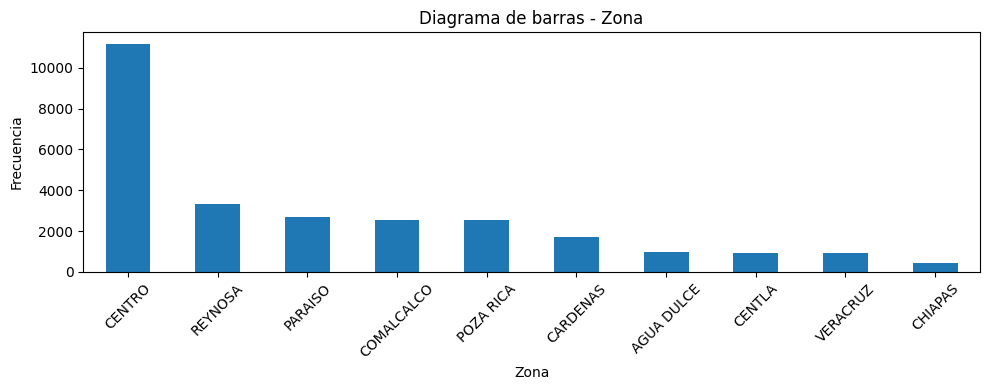

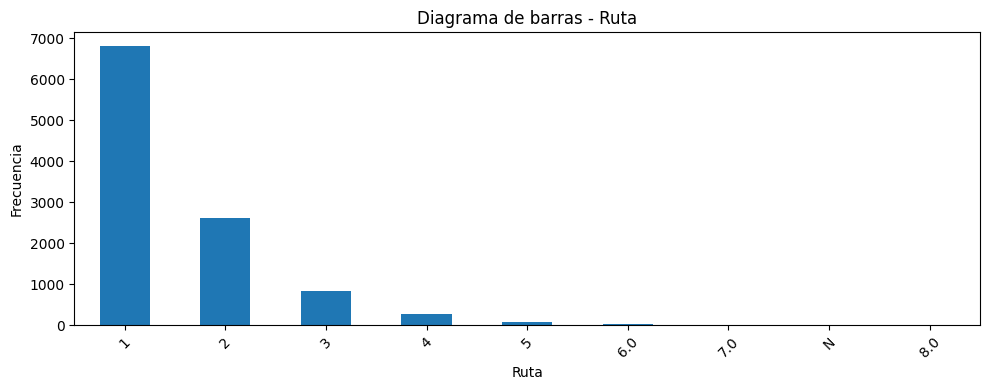

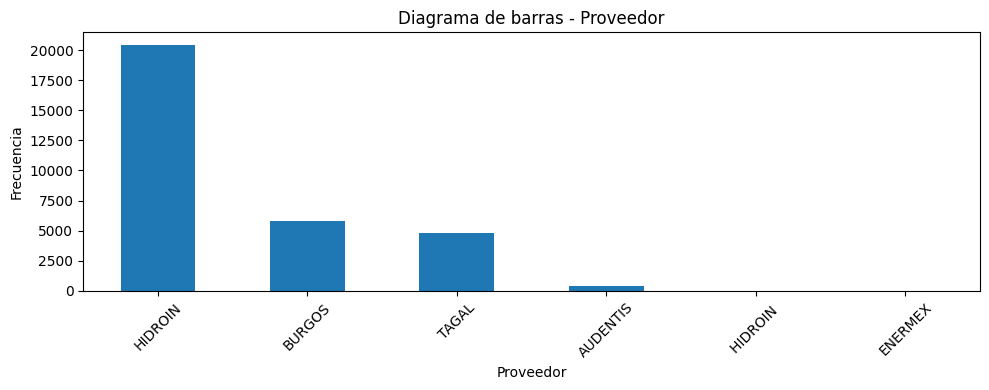

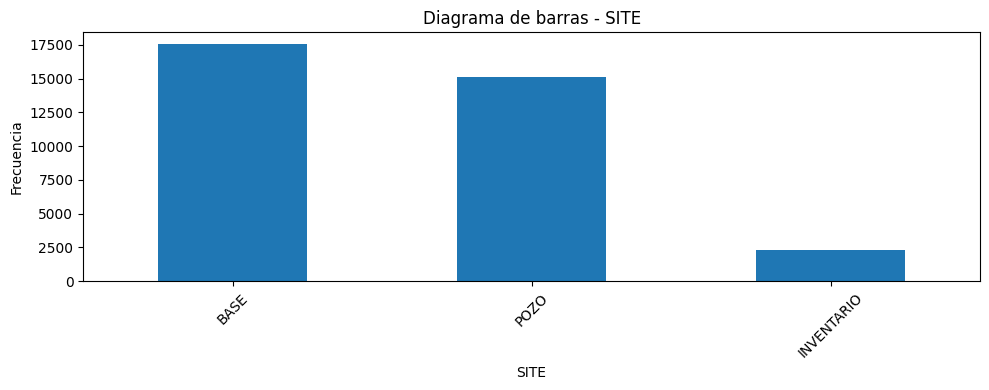

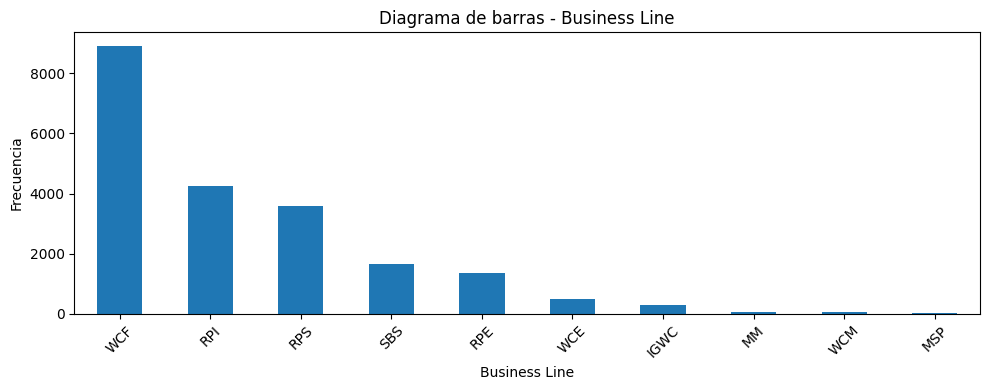

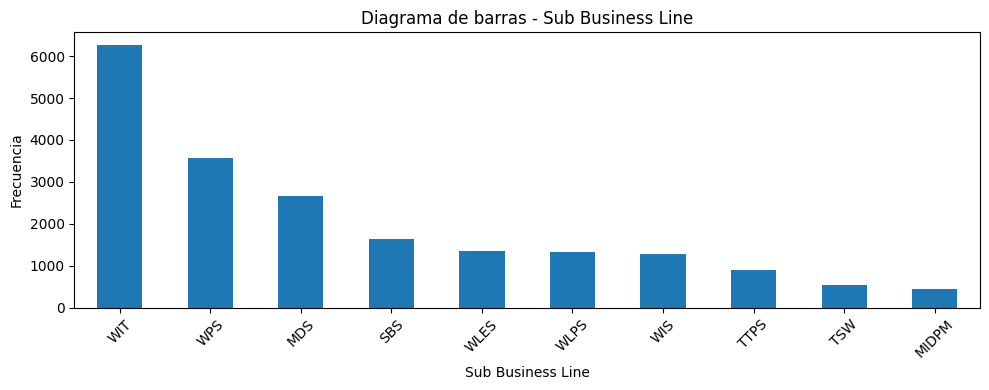

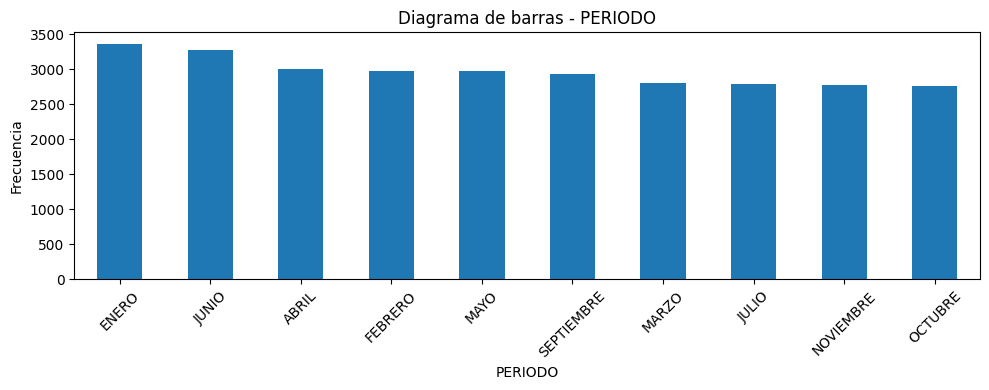

In [30]:
for col in columnas_cualitativas:
    plt.figure(figsize=(10, 4))
    dfc[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Diagrama de barras - {col}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Las columnas de costos no son normales por lo cual no son normales en mardia.

In [32]:
from scipy.stats import normaltest

columnas_costos = [
    'PRECIO POR LT', 'FLETE', 'FLETE / MANIOBRA', 'COSTO TOTAL',
    'IEPS x LT', 'Costo IEPS', 'Costo TOTAL SIN IEPS', 'Costo Total + IEPS'
]

alpha = 0.05
variables_costos_normales = []
print(f" Prueba de normalidad (α = {alpha})")

 Prueba de normalidad (α = 0.05)


In [33]:
for col in columnas_costos:
    data = dfc[col].dropna()
    if len(data) >= 8:
        stat, p = normaltest(data)
        print(f"{col} — p-valor: {p:.5f}")
        if p > alpha:
            print("Distribución normal")
            variables_costos_normales.append(col)
        else:
            print(" No es normal")

PRECIO POR LT — p-valor: 0.00000
 No es normal
FLETE — p-valor: 0.00000
 No es normal
FLETE / MANIOBRA — p-valor: 0.00000
 No es normal
COSTO TOTAL — p-valor: 0.00000
 No es normal
IEPS x LT — p-valor: 0.00000
 No es normal
Costo IEPS — p-valor: 0.00000
 No es normal
Costo TOTAL SIN IEPS — p-valor: 0.00000
 No es normal
Costo Total + IEPS — p-valor: 0.00000
 No es normal


In [34]:
# Asegúrate de tener la columna de fecha en formato datetime
dfc['Fecha de Solicitud'] = pd.to_datetime(dfc['Fecha de Solicitud'], errors='coerce')

# Filtrar entre 2020 y 2024
df_filtrado = dfc[(dfc['Fecha de Solicitud'].dt.year >= 2020) &
                  (dfc['Fecha de Solicitud'].dt.year <= 2024)]

# Agrupar por mes y sumar COSTO TOTAL
serie_mensual = df_filtrado.groupby(pd.Grouper(key='Fecha de Solicitud', freq='M'))['COSTO TOTAL'].sum()


/var/folders/qy/0tzg7tk54c1g29r191p_gzhh0000gn/T/ipykernel_84930/128559645.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_mensual = df_filtrado.groupby(pd.Grouper(key='Fecha de Solicitud', freq='M'))['COSTO TOTAL'].sum()


Se grafican series temporales de fechas de solicitud vs COSTO TOTAL a tráves de los meses de 2020  a 2024. Se logra ver un pico en 2022 en julio que los costos son más altos, un poco antes

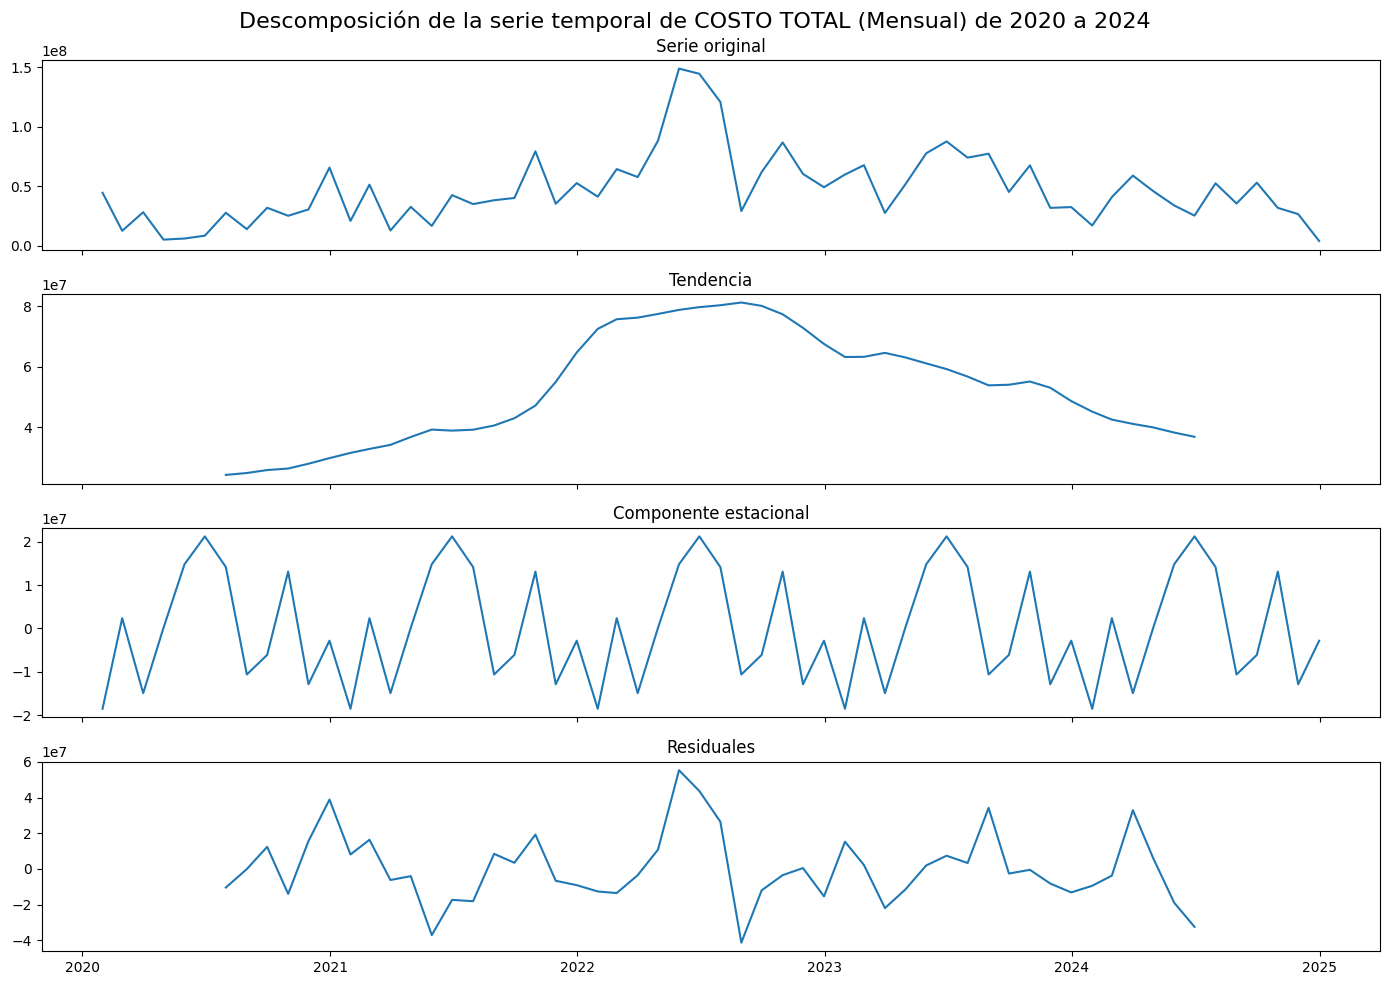

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Eliminar valores nulos y asegurarse de que tenga índice datetime
serie_mensual = serie_mensual.dropna()
serie_mensual.index = pd.to_datetime(serie_mensual.index)

# Descomposición (modelo aditivo)
descomposicion = seasonal_decompose(serie_mensual, model='additive', period=12)

# Graficar manualmente con títulos en cada subplot
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(descomposicion.observed)
axs[0].set_title('Serie original')

axs[1].plot(descomposicion.trend)
axs[1].set_title('Tendencia')

axs[2].plot(descomposicion.seasonal)
axs[2].set_title('Componente estacional')

axs[3].plot(descomposicion.resid)
axs[3].set_title('Residuales')

plt.suptitle('Descomposición de la serie temporal de COSTO TOTAL (Mensual) de 2020 a 2024', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()



Por otro lado, se grafican series de tiempo de fecha de solicitud vs COSTO total, ahora independientemente en cada año

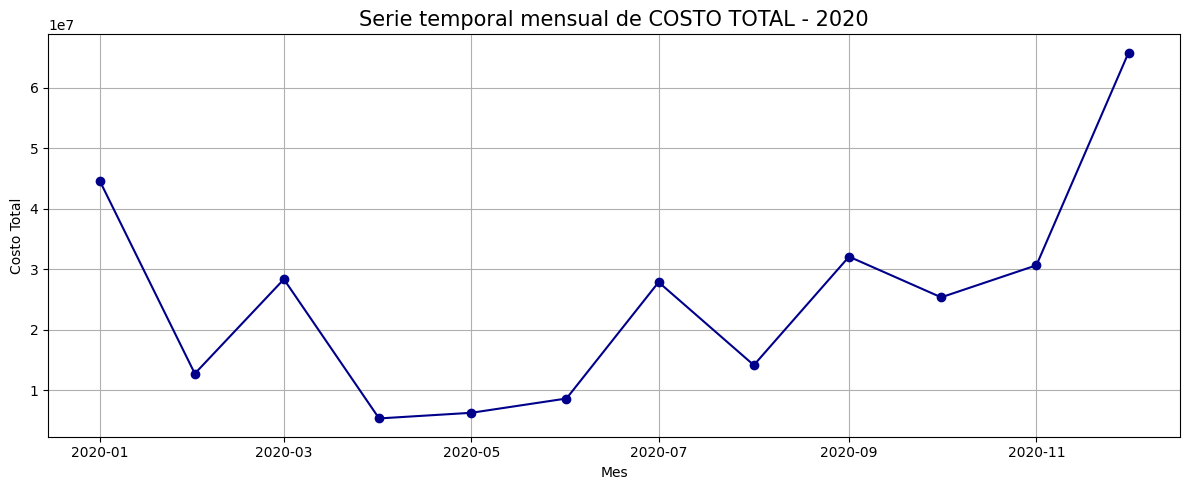

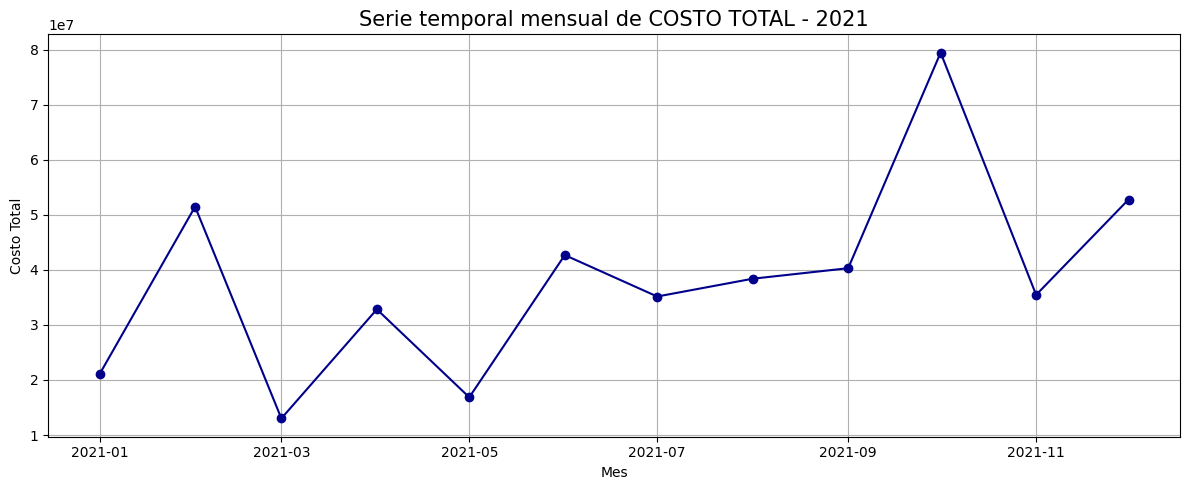

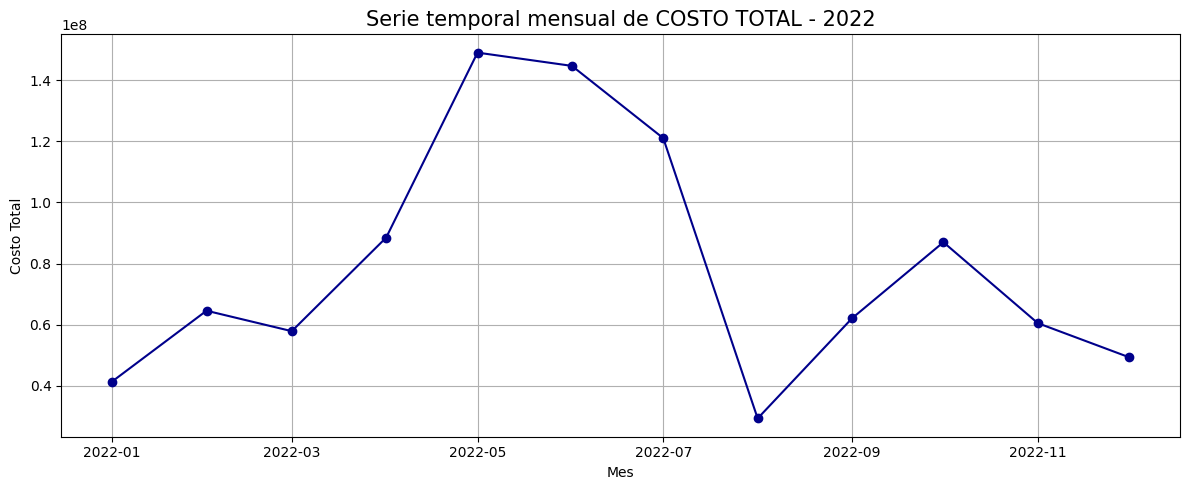

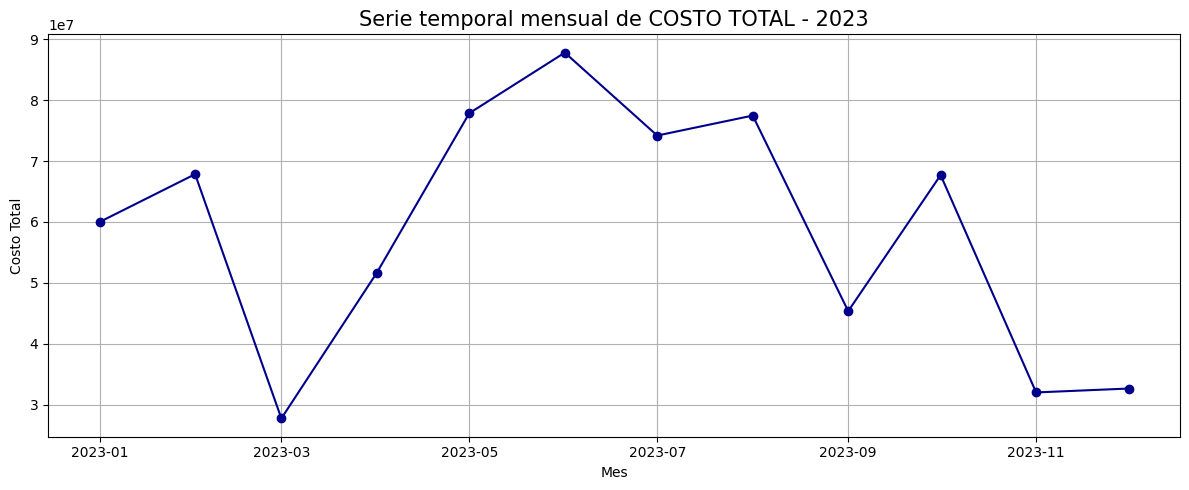

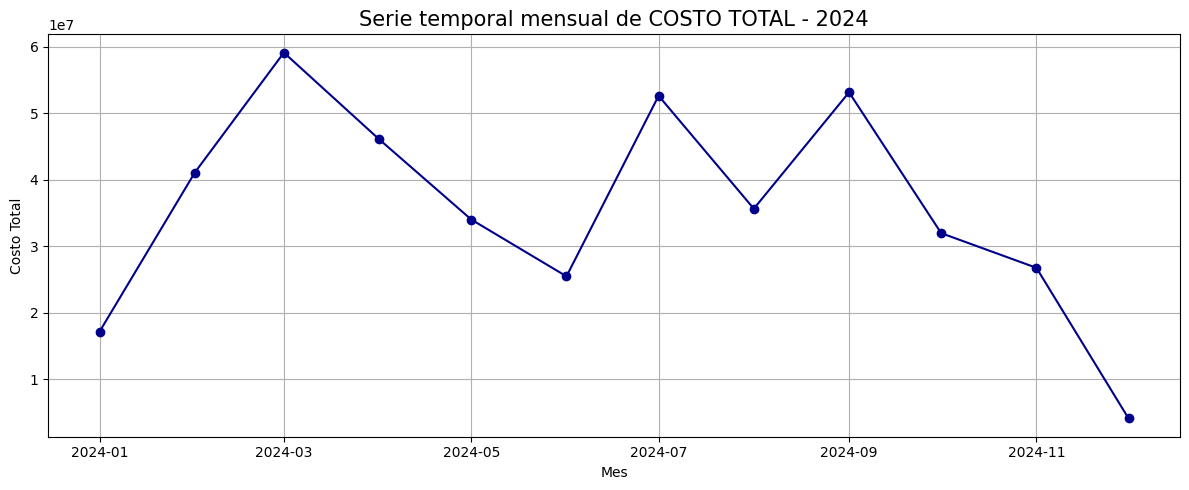

In [ ]:
# Asegurar que la fecha esté en formato datetime
dfc['Fecha de Solicitud'] = pd.to_datetime(dfc['Fecha de Solicitud'], errors='coerce')

# Configuración de gráficos
plt.rcParams.update({'figure.figsize': (12, 5)})

# Crear un gráfico de línea por cada año de 2020 a 2024
for anio in range(2020, 2025):
    # Filtrar datos de ese año
    df_anual = dfc[dfc['Fecha de Solicitud'].dt.year == anio]

    # Agrupar por mes y sumar el COSTO TOTAL
    serie_anual = df_anual.groupby(df_anual['Fecha de Solicitud'].dt.to_period('M'))['COSTO TOTAL'].sum()

    # Asegurar el índice en datetime para graficar
    serie_anual.index = serie_anual.index.to_timestamp()

    # Graficar
    plt.figure()
    plt.plot(serie_anual.index, serie_anual.values, marker='o', linestyle='-', color='darkblue')
    plt.title(f'Serie temporal mensual de COSTO TOTAL - {anio}', fontsize=15)
    plt.xlabel('Mes')
    plt.ylabel('Costo Total')
    plt.grid(True)
    plt.tight_layout()
    plt.show()